In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")


In [2]:
# Load the train data
train_df = pd.read_csv('../data/raw/train.csv')
print(f"train data loaded")

train data loaded


In [ ]:
# 1. Target variable Analysis
print("1. Target Variable (Tm) analysis")
print("\nDescriptive Statistics for Tm:")
print(train_df['Tm'].describe())

1. Target Variable (Tm) analysis

Descriptive Statistics for Tm:
count    2662.000000
mean      278.263452
std        85.117914
min        53.540000
25%       217.000000
50%       277.300000
75%       325.150000
max       897.150000
Name: Tm, dtype: float64


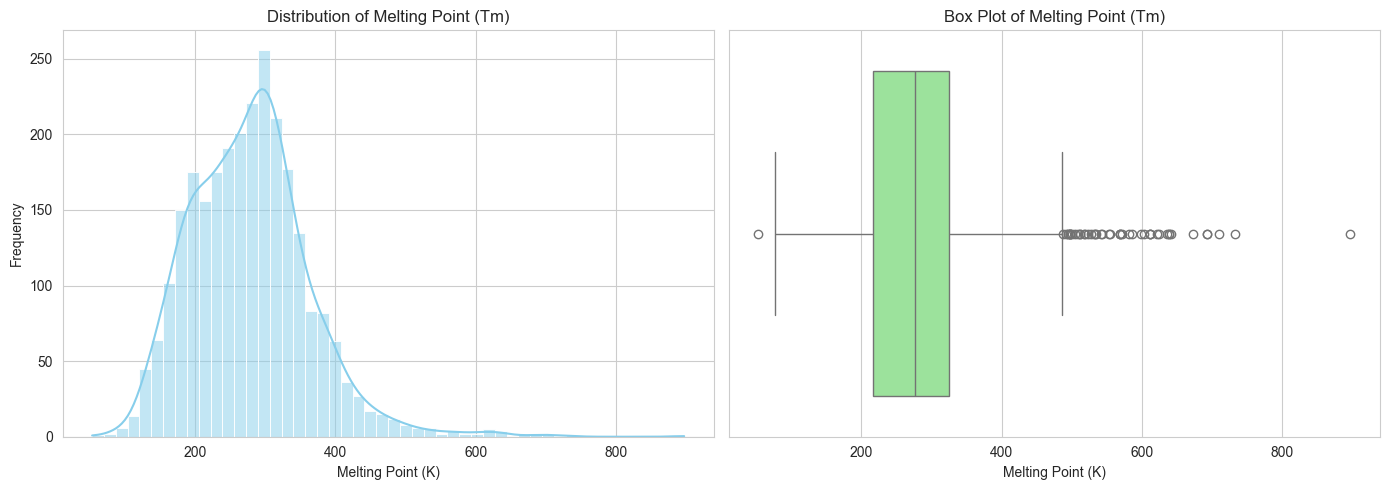

In [ ]:
# Plot the distribution of Tm
plt.figure(figsize=(14, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(train_df['Tm'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Melting Point (Tm)')
plt.xlabel('Melting Point (K)')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=train_df['Tm'], color='lightgreen')
plt.title('Box Plot of Melting Point (Tm)')
plt.xlabel('Melting Point (K)')

plt.tight_layout()
plt.show()



2. Feature Analysis

Feature Sparsity (Top 10 most sparse):
Group 424    100.0
Group 423    100.0
Group 422    100.0
Group 421    100.0
Group 383    100.0
Group 384    100.0
Group 385    100.0
Group 376    100.0
Group 377    100.0
Group 342    100.0
dtype: float64


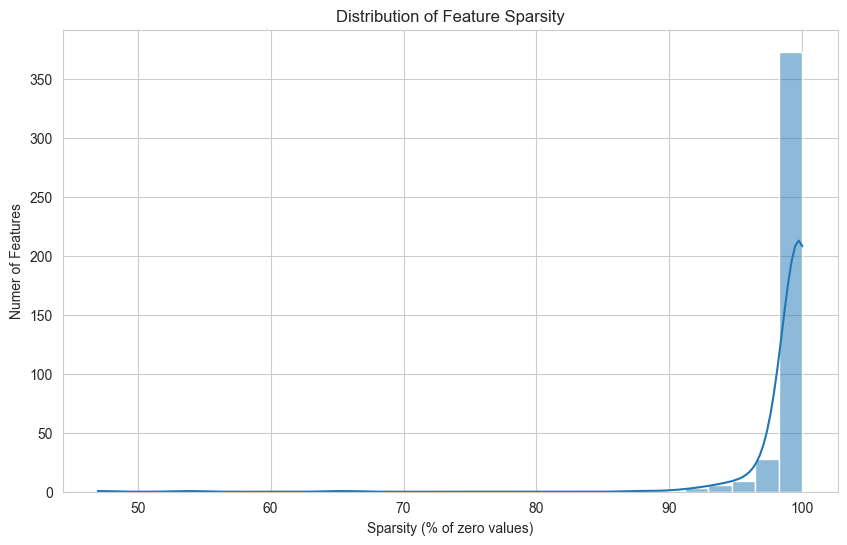

In [13]:
# 2. Feature Analysis
print("\n2. Feature Analysis")
features = [col for col in train_df.columns if col.startswith('Group')]
X = train_df[features]

# Sparsity Analysis
sparsity = (X == 0).sum() / len(X) * 100
sparsity = sparsity.sort_values(ascending=False)

print("\nFeature Sparsity (Top 10 most sparse):")
print(sparsity.head(10))

plt.figure(figsize=(10, 6))
sns.histplot(sparsity, bins=30, kde=True)
plt.title('Distribution of Feature Sparsity')
plt.xlabel('Sparsity (% of zero values)')
plt.ylabel('Numer of Features')
plt.show()

In [16]:
# 3. Feature Variance Analysis
print("3. Feature Variance Analysis")
variance = X.var()
low_variance_features = variance[variance < 0.01].sort_values()

print(f"\nFound {len(low_variance_features)} features with variance less than 0.01")
print("Top 10 lowest variance features:")
print(low_variance_features.head(10))

3. Feature Variance Analysis

Found 319 features with variance less than 0.01
Top 10 lowest variance features:
Group 424    0.0
Group 12     0.0
Group 422    0.0
Group 423    0.0
Group 421    0.0
Group 417    0.0
Group 420    0.0
Group 28     0.0
Group 419    0.0
Group 102    0.0
dtype: float64


4. Feature Target Correlation

Top 10 Features Most Positively Correlated with Tm:
Group 15     0.387580
Group 18     0.223551
Group 16     0.223530
Group 401    0.222525
Group 17     0.194420
Group 123    0.179178
Group 365    0.176346
Group 31     0.171773
Group 412    0.165621
Group 30     0.162579
Name: Tm, dtype: float64

Top 10 Features Most Negatively Correlated with Tm:
Group 399   NaN
Group 411   NaN
Group 413   NaN
Group 417   NaN
Group 419   NaN
Group 420   NaN
Group 421   NaN
Group 422   NaN
Group 423   NaN
Group 424   NaN
Name: Tm, dtype: float64


C:\Users\bharg\AppData\Local\Temp\ipykernel_28472\3853770294.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_correlated_features.values, y=top_correlated_features.index, palette="vlag")


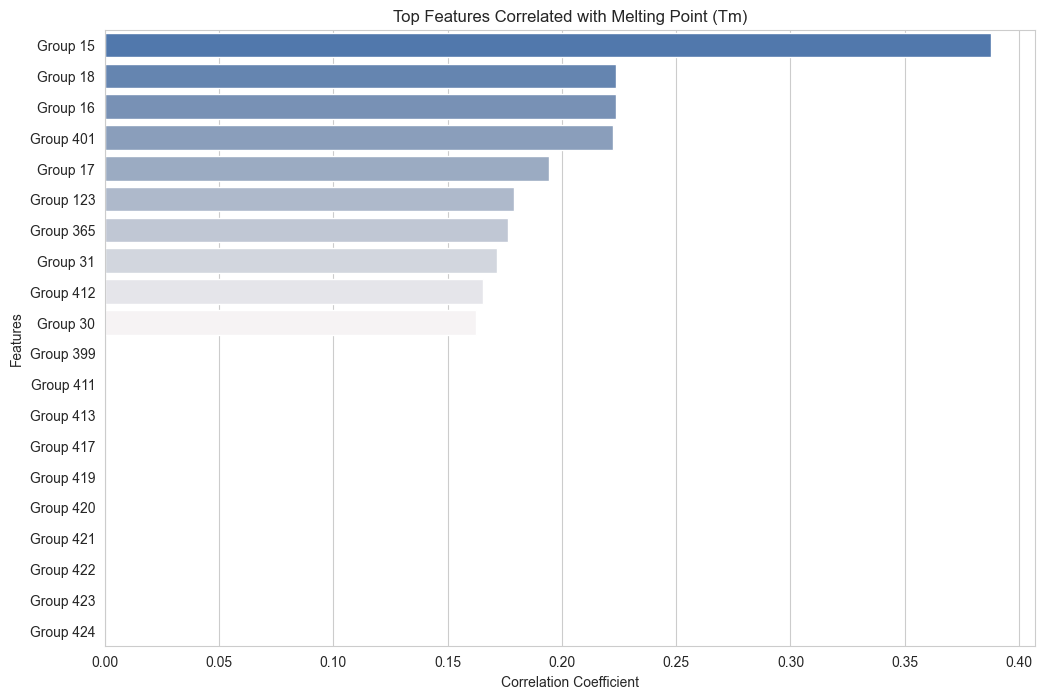

In [18]:
# 4. Fearure Target Correlation
print("4. Feature Target Correlation")
correlations = train_df[features + ['Tm']].corr()['Tm'].sort_values(ascending=False)

print("\nTop 10 Features Most Positively Correlated with Tm:")
print(correlations.head(11)[1:]) # Exclue Tm itself

print("\nTop 10 Features Most Negatively Correlated with Tm:")
print(correlations.tail(10))

top_correlated_features = pd.concat([correlations.head(11)[1:], correlations.tail(10)]).sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_correlated_features.values, y=top_correlated_features.index, palette="vlag")
plt.title('Top Features Correlated with Melting Point (Tm)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

5. Inter feature Correlation


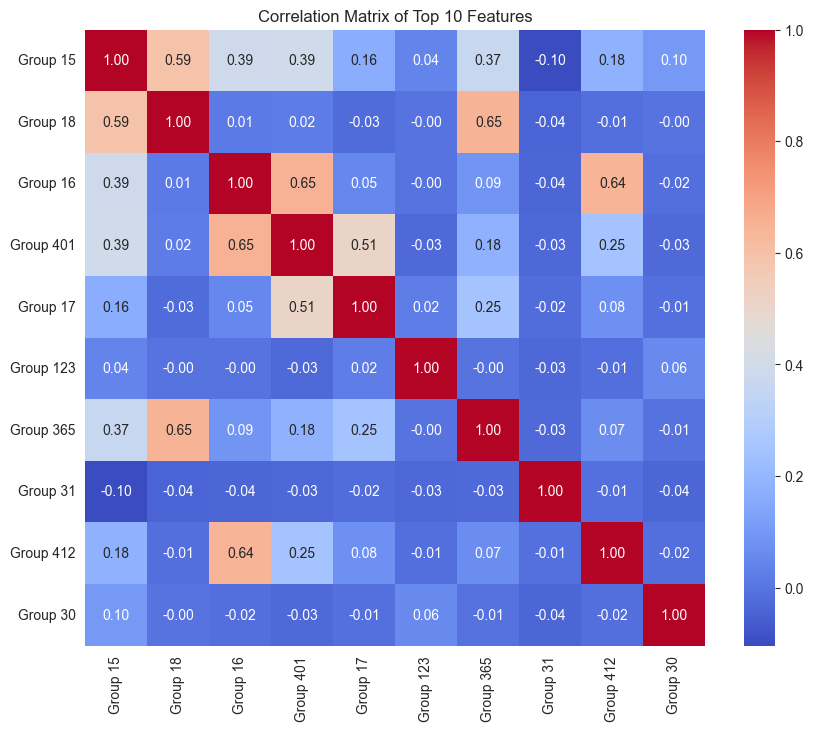

In [19]:
# 5. Inter feature Correlation
print("5. Inter feature Correlation")
top_10_features = correlations.head(11)[1:].index
correlation_matrix = train_df[top_10_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Top 10 Features')
plt.show()

6. SMILES String Analysis

Correlation between SMILES length and Tm: 0.4923


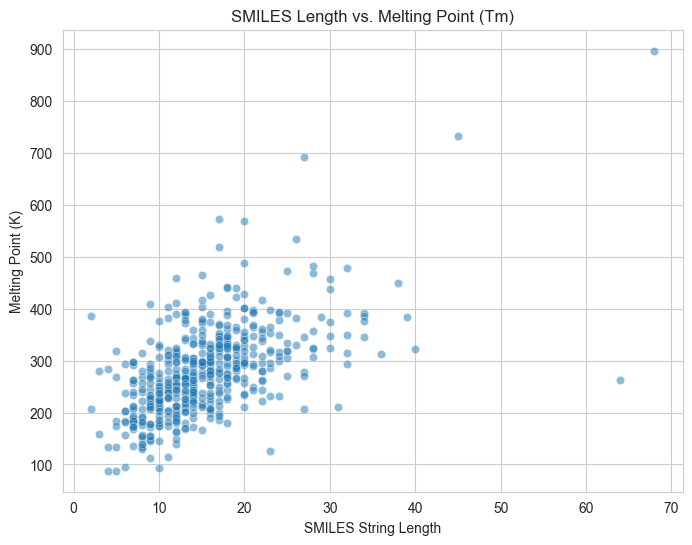

In [20]:
# 6. SMILES
print("6. SMILES String Analysis")
train_df['SMILES_len'] = train_df['SMILES'].apply(len)
smiles_corr = train_df[['SMILES_len', 'Tm']].corr()['Tm']['SMILES_len']

print(f"\nCorrelation between SMILES length and Tm: {smiles_corr:.4f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='SMILES_len', y='Tm', data=train_df.sample(500), alpha=0.5)
plt.title('SMILES Length vs. Melting Point (Tm)')
plt.xlabel("SMILES String Length")
plt.ylabel('Melting Point (K)')
plt.show()